## P1 suma de dos dados

In [353]:
import random
import matplotlib.pyplot as plt
import numpy as np

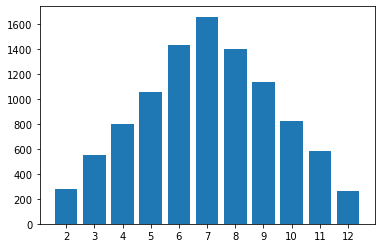

Para la suma de dados igual a 7, la simulación de MC dió una probabilidad de 0.166; la probabilidad matemática es de 0.1667; se obtuvo un error del 0.4199%.


In [199]:
iteraciones=10000
suma_dict = {
    '2':0,
    '3':0,
    '4':0,
    '5':0,
    '6':0,
    '7':0,
    '8':0,
    '9':0,
    '10':0,
    '11':0,
    '12':0
}
lanzada=0
for i in range(iteraciones):
    dado1 = random.randint(1,6)
    dado2 = random.randint(1,6)
    suma = dado1 + dado2
    suma_dict[str(suma)]+=1
    lanzada+=1
plt.bar(range(len(suma_dict)), list(suma_dict.values()), align='center')
plt.xticks(range(len(suma_dict)), list(suma_dict.keys()))
plt.show()
#Probabilidad de tener 7
MC7 = suma_dict['7']/lanzada
P7 = round(6/36,4)
error = round(abs(MC7-P7)/P7*100,4)
print(f'Para la suma de dados igual a 7, la simulación de MC dió una probabilidad de {str(MC7)}; la probabilidad matemática es de {P7}; se obtuvo un error del {error}%.')

## P2 Aproximación de $\pi$

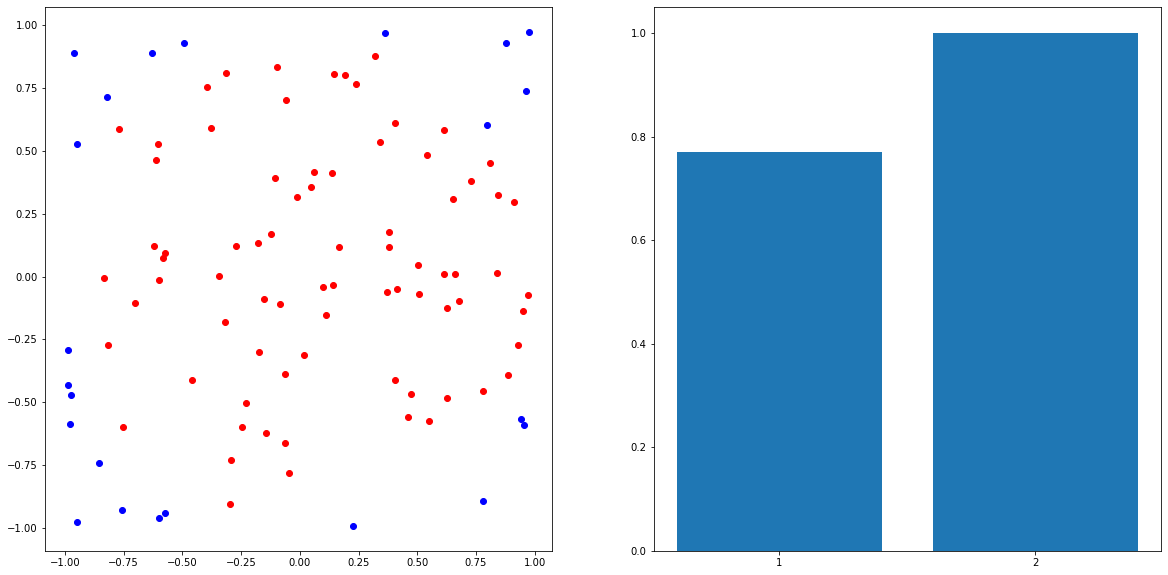

La simulación de MC dió una probabilidad de 0.77; la probabilidad matemática es de 0.7854; se obtuvo un error del 1.9608%.


In [359]:
iteraciones=100
puntos_cuad=0
puntos_circ=0
coord_xc=[]
coord_yc=[]
coord_xb=[]
coord_yb=[]
for i in range(iteraciones):
    x = random.uniform(-1,1)
    y = random.uniform(-1,1)
    
    r = (x**2 + y**2)**0.5
    
    if r<=1:
        puntos_circ+=1
        coord_xc.append(x)
        coord_yc.append(y)
    else:
        coord_xb.append(x)
        coord_yb.append(y)
    puntos_cuad+=1
pi = 4*puntos_circ/puntos_cuad
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(coord_xc,coord_yc,'ro')
ax1.plot(coord_xb,coord_yb,'bo')
ax2.bar(['1','2'], [puntos_circ/iteraciones,puntos_cuad/iteraciones], align='center')
plt.rcParams['figure.figsize'] = 20.0,10.0
plt.show()
#Probabilidad de caer en el círculo
MCpi = puntos_circ/iteraciones
Ppi = round(np.pi/4,4)
error = round(abs(MCpi-Ppi)/Ppi*100,4)
print(f'La simulación de MC dió una probabilidad de {MCpi}; la probabilidad matemática es de {Ppi}; se obtuvo un error del {error}%.')

In [355]:
np.pi

3.141592653589793